In [1]:
import json
import pandas as pd
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt

In [2]:
with open('../results/statements_scores_by_sentence_few_shot.json') as file:
    statement_fewshot_dict = json.load(file)

In [3]:
def logit(scores):
    '''
    scores::list
    Computes logit score for the list of input scores
    '''
    scores = [x for x in scores if isinstance(x, int) or isinstance(x, float)]
    hawk = sum([i for i in scores if i>0 ])
    dove = abs(sum([i for i in scores if i< 0 ]))
    
    logit_scaled = np.log((hawk+0.5)/(dove+0.5))

    return(logit_scaled)

In [4]:
year = []
mean_score = []
sd_score = []
logit_score = []
for key, value in zip(statement_fewshot_dict.keys(), statement_fewshot_dict.values()):
    year.append(key)
    mean_score.append(np.mean([s for s in value if isinstance(s, int) or isinstance(s, float)]))
    sd_score.append(np.std([s for s in value if isinstance(s, int) or isinstance(s, float)]))
    logit_score.append(logit([s for s in value if isinstance(s, int) or isinstance(s, float)]))


In [5]:
results = pd.DataFrame(list(zip(year, mean_score, sd_score, logit_score)), 
                           columns = ['year', 'mean_score', 'sd_score', 'logit_score'])

In [59]:
results[['year', 'mean_score']].to_csv('../data/statement_fewshot_mean_score.csv')
results[['year', 'sd_score']].to_csv('../data/statement_fewshot_sd_score.csv')
results[['year', 'logit_score']].to_csv('../data/statement_fewshot_logit.csv')

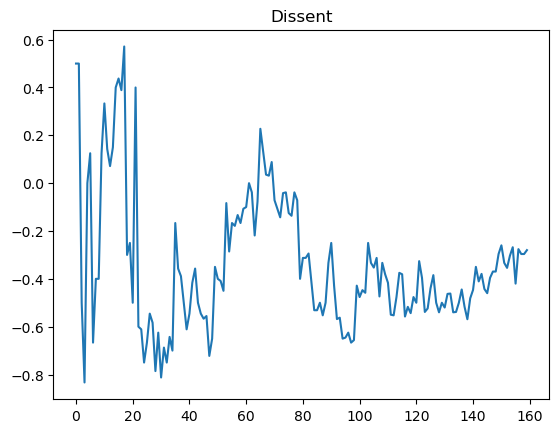

In [7]:
plot = results['mean_score'].plot(kind='line', title="Dissent")